# learning rate scheduler debug

**Goal:** Try to understand how these learning rate schedulers work.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.optim.lr_scheduler import LambdaLR, CosineAnnealingLR, ChainedScheduler, CosineAnnealingWarmRestarts

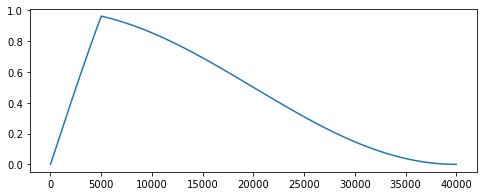

In [9]:
T = 40_000
warmup_steps = 5_000

xx = np.linspace(0,T,T)

lr = .5 * (1 + np.cos(xx * np.pi / T))
lr *= np.where(xx < warmup_steps, xx/warmup_steps,1)

plt.figure(figsize=(8,3)) 
plt.plot(xx,lr)

In [52]:
m = torch.nn.Sequential(torch.nn.Linear(2,1))

In [68]:
CosineAnnealingWarmRestarts?

Init signature:
CosineAnnealingWarmRestarts(
    optimizer,
    T_0,
    T_mult=1,
    eta_min=0,
    last_epoch=-1,
    verbose=False,
)
Docstring:     
Set the learning rate of each parameter group using a cosine annealing
schedule, where :math:`\eta_{max}` is set to the initial lr, :math:`T_{cur}`
is the number of epochs since the last restart and :math:`T_{i}` is the number
of epochs between two warm restarts in SGDR:

.. math::
    \eta_t = \eta_{min} + \frac{1}{2}(\eta_{max} - \eta_{min})\left(1 +
    \cos\left(\frac{T_{cur}}{T_{i}}\pi\right)\right)

When :math:`T_{cur}=T_{i}`, set :math:`\eta_t = \eta_{min}`.
When :math:`T_{cur}=0` after restart, set :math:`\eta_t=\eta_{max}`.

It has been proposed in
`SGDR: Stochastic Gradient Descent with Warm Restarts`_.

Args:
    optimizer (Optimizer): Wrapped optimizer.
    T_0 (int): Number of iterations for the first restart.
    T_mult (int, optional): A factor increases :math:`T_{i}` after a restart. Default: 1.
    eta_min (float, opt

In [64]:
LinearWarmupCosineAnnealingLR

NameError: name 'LinearWarmupCosineAnnealingLR' is not defined

In [62]:


# Learning rate schedule config
opt = torch.optim.Adam(m.parameters(), 1)
# from pytorch documentation : https://pytorch.org/docs/stable/optim.html
scheduler1 = LambdaLR(opt, \
            lr_lambda= lambda x : x/warmup_steps if x < warmup_steps else 1)
scheduler2 = CosineAnnealingLR(opt, T_max=Ntrain)
scheduler = ChainedScheduler([scheduler1, scheduler2])

lr_torch = []

for i in range(Ntrain):

    lr_torch.append(opt.param_groups[0]['lr'])
    scheduler1.step()
    # scheduler2.step()
    
lr_torch = np.array(lr_torch)


/opt/conda/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


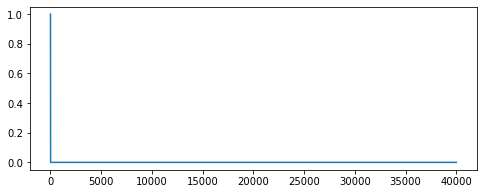

In [63]:
plt.figure(figsize=(8,3)) 
# plt.plot(xx,lr)
plt.plot(xx,lr_torch)
plt.xlim(0,5000)